In [245]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, StackingClassifier, BaggingClassifier, VotingClassifier

In [246]:
train = pd.read_csv(r'C:\Users\Rahul\Desktop\Cardiac-Risk-Prediction\Train.csv')
test = pd.read_csv(r'C:\Users\Rahul\Desktop\Cardiac-Risk-Prediction\Test.csv')
sample = pd.read_excel(r'C:\Users\Rahul\Desktop\Cardiac-Risk-Prediction\Sample_Submission.xlsx')

In [247]:
train.head()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,UnderRisk
0,1,1,1,0,1,0,0,0,1,0,0,0,no
1,1,0,1,0,1,0,0,0,1,0,0,0,no
2,1,0,1,0,1,0,0,0,1,0,0,0,no
3,1,0,1,0,1,0,0,0,1,0,0,0,no
4,1,0,0,0,0,0,1,1,0,0,0,0,no


In [248]:
test.head()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness
0,1,0,1,1,1,0,0,0,1,0,0,0
1,1,0,1,0,1,0,0,0,1,0,0,0
2,1,1,1,0,1,0,0,0,1,0,0,0
3,2,0,0,0,1,0,0,0,1,0,0,0
4,1,0,1,0,0,0,0,1,1,0,0,0


In [249]:
train.describe()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness
count,889.000000,889.000000,889.00000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,1.258718,0.120360,0.83802,0.086614,0.919010,0.055118,0.042745,0.082115,0.925759,0.017998,0.021372,0.032621
std,0.500557,0.325565,0.36864,0.281427,0.272973,0.228339,0.202395,0.274694,0.262310,0.133018,0.144704,0.177742
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,2.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [250]:
test.describe()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness
count,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000
mean,1.295812,0.120419,0.793194,0.054974,0.892670,0.052356,0.060209,0.107330,0.924084,0.005236,0.020942,0.031414
std,0.511221,0.325878,0.405547,0.228228,0.309938,0.223036,0.238186,0.309938,0.265211,0.072262,0.143379,0.174662
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [251]:
train.isnull().sum()

Gender                             0
Chain_smoker                       0
Consumes_other_tobacco_products    0
HighBP                             0
Obese                              0
Diabetes                           0
Metabolic_syndrome                 0
Use_of_stimulant_drugs             0
Family_history                     0
History_of_preeclampsia            0
CABG_history                       0
Respiratory_illness                0
UnderRisk                          0
dtype: int64

In [252]:
test.isnull().sum()

Gender                             0
Chain_smoker                       0
Consumes_other_tobacco_products    0
HighBP                             0
Obese                              0
Diabetes                           0
Metabolic_syndrome                 0
Use_of_stimulant_drugs             0
Family_history                     0
History_of_preeclampsia            0
CABG_history                       0
Respiratory_illness                0
dtype: int64

In [253]:
for c in train.columns :
    print(train[c].value_counts())

1    607
2    256
0     26
Name: Gender, dtype: int64
0    782
1    107
Name: Chain_smoker, dtype: int64
1    745
0    144
Name: Consumes_other_tobacco_products, dtype: int64
0    812
1     77
Name: HighBP, dtype: int64
1    817
0     72
Name: Obese, dtype: int64
0    840
1     49
Name: Diabetes, dtype: int64
0    851
1     38
Name: Metabolic_syndrome, dtype: int64
0    816
1     73
Name: Use_of_stimulant_drugs, dtype: int64
1    823
0     66
Name: Family_history, dtype: int64
0    873
1     16
Name: History_of_preeclampsia, dtype: int64
0    870
1     19
Name: CABG_history, dtype: int64
0    860
1     29
Name: Respiratory_illness, dtype: int64
no     699
yes    190
Name: UnderRisk, dtype: int64


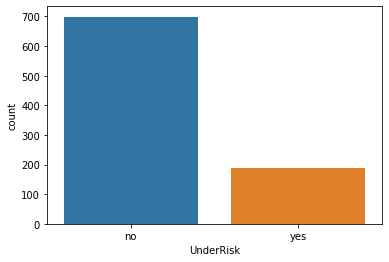

In [254]:
sns.countplot(train.UnderRisk)

# ANALYSIS

In [255]:
for c in train.columns[:-1]:
    print(train.groupby(c)['UnderRisk'].value_counts(),'\n\n')

Gender  UnderRisk
0       no            22
        yes            4
1       no           461
        yes          146
2       no           216
        yes           40
Name: UnderRisk, dtype: int64 


Chain_smoker  UnderRisk
0             no           598
              yes          184
1             no           101
              yes            6
Name: UnderRisk, dtype: int64 


Consumes_other_tobacco_products  UnderRisk
0                                no           122
                                 yes           22
1                                no           577
                                 yes          168
Name: UnderRisk, dtype: int64 


HighBP  UnderRisk
0       no           652
        yes          160
1       no            47
        yes           30
Name: UnderRisk, dtype: int64 


Obese  UnderRisk
0      no            59
       yes           13
1      no           640
       yes          177
Name: UnderRisk, dtype: int64 


Diabetes  UnderRisk
0         no           65

In [256]:
ind_no = []
train = train.groupby('Family_history').get_group(1).reset_index(drop = True)
d = test[test.Family_history==0].index
ind_no.extend(d)
del train['Family_history']
del test['Family_history']
test.drop(index = d, inplace = True)
len(ind_no)

29

In [257]:
train = train.groupby('CABG_history').get_group(0).reset_index(drop = True)
d = test[test.CABG_history==1].index.tolist()
del train['CABG_history']
del test['CABG_history']
ind_no.extend(d)
test.drop(index = d, inplace = True)
len(ind_no)

37

### Gen 1 -> Female

In [258]:
train[train.History_of_preeclampsia==1]

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,History_of_preeclampsia,Respiratory_illness,UnderRisk
31,1,1,1,0,1,1,0,0,1,0,no
53,1,0,1,0,1,0,0,0,1,0,no
139,1,0,1,0,1,0,0,0,1,0,no
159,1,0,1,0,1,0,0,0,1,0,no
292,1,1,1,0,1,1,0,0,1,0,no
304,0,0,1,0,1,0,0,0,1,0,no
384,1,1,1,0,1,0,0,0,1,0,no
426,1,0,1,0,1,1,0,0,1,0,no
445,1,0,1,0,1,1,0,0,1,0,no
451,1,1,1,0,1,0,0,0,1,0,no


In [259]:
train.drop(index=304, inplace = True)
train.reset_index(drop = True, inplace = True)

In [260]:
train = train.groupby('History_of_preeclampsia').get_group(0).reset_index(drop = True)
d = test[test.History_of_preeclampsia==1].index.tolist()
del train['History_of_preeclampsia']
del test['History_of_preeclampsia']
ind_no.extend(d)
test.drop(index = d, inplace = True)
len(ind_no)

39

In [261]:
train = train.groupby('Chain_smoker').get_group(0).reset_index(drop = True)
d = test[test.Chain_smoker==1].index.tolist()
del train['Chain_smoker']
del test['Chain_smoker']
ind_no.extend(d)
test.drop(index = d, inplace = True)
len(ind_no)

77

In [262]:
del train['Metabolic_syndrome']
del test['Metabolic_syndrome']

In [263]:
train.head(1)

,Gender,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Use_of_stimulant_drugs,Respiratory_illness,UnderRisk
0,1,1,0,1,0,0,0,no


In [264]:
train['disease'] = train.Gender.astype('str')+train.Consumes_other_tobacco_products.astype('str')+train.Use_of_stimulant_drugs.astype('str')+train['HighBP'].astype('str')+train.Obese.astype('str')+train.Diabetes.astype('str')+train.Respiratory_illness.astype('str')
test['disease'] = test.Gender.astype('str')+test.Consumes_other_tobacco_products.astype('str')+test.Use_of_stimulant_drugs.astype('str')+test['HighBP'].astype('str')+test.Obese.astype('str')+test.Diabetes.astype('str')+test.Respiratory_illness.astype('str')

In [265]:
train['any_drug'] = train.Consumes_other_tobacco_products + train.Use_of_stimulant_drugs
test['any_drug'] = test.Consumes_other_tobacco_products + test.Use_of_stimulant_drugs

In [266]:
tr = set(train.disease).difference(set(test.disease))
te = set(test.disease).difference(set(train.disease))

train.disease = train.disease.apply(lambda x: 'other' if x in tr else x).astype('category')
test.disease = test.disease.apply(lambda x: 'other' if x in te else x).astype('category')

In [267]:
val = {'no':['2010000','2001100', '2111000', '1100111', '1000101','1111000'],
         'yes':['1101110','0110000']}

In [268]:
d = list(test[test.disease.apply(lambda x: x in val['no'])].index)
test.drop(index = d, inplace = True)
ind_no.extend(d)

In [269]:
ind_yes = []
d = list(test[test.disease.apply(lambda x: x in val['yes'])].index)
test.drop(index = d, inplace = True)
ind_yes.extend(d)

In [270]:
for i,j in enumerate(train.columns):
    for c in train.columns[i+1:]:
        print('Columns Fixed v/s Variable:\t', j,c)
        print(train.groupby([j,c])['UnderRisk'].value_counts(),'\n\n')

Columns Fixed v/s Variable:	 Gender Consumes_other_tobacco_products
Gender  Consumes_other_tobacco_products  UnderRisk
0       0                                no             3
                                         yes            1
        1                                no            13
                                         yes            3
1       0                                no            31
                                         yes           19
        1                                no           279
                                         yes          122
2       0                                no            11
                                         yes            1
        1                                no           178
                                         yes           38
Name: UnderRisk, dtype: int64 


Columns Fixed v/s Variable:	 Gender HighBP
Gender  HighBP  UnderRisk
0       0       no            15
                yes            4
        1       n

Gender  Consumes_other_tobacco_products  UnderRisk
2       0                                no            11
                                         yes            1
                                         
Consumes_other_tobacco_products  Metabolic_syndrome  UnderRisk
0                                0                   no            43
                                                     yes           21
                                 1                   no             2
1                                0                   no           470
                                                     yes          161
                                 1                   yes            2
                                 
Consumes_other_tobacco_products  Respiratory_illness  UnderRisk
0                                0                    no            42
                                                      yes           21
                                 1                    no             3

Obese  Respiratory_illness  UnderRisk
0      0                    no            24
                            yes           11
       1                    yes            2

Use_of_stimulant_drugs  Respiratory_illness  UnderRisk
0                       0                    no           474
                                             yes          162
                        1                    no            16
                                             yes            9
1                       0                    no            25
                                             yes           11
                        1                    yes            2

Columns Fixed v/s Variable:	 Consumes_other_tobacco_products Respiratory_illness
Consumes_other_tobacco_products  Respiratory_illness  UnderRisk
0                                0                    no            65
                                                      yes           22
                                 1                    no             4
1                                0                    no           516
                                                      yes          157
                                 1                    no            14
                                                      yes           11

In [271]:
train.shape

(699, 10)

In [272]:
tr_dummies = pd.DataFrame(pd.get_dummies(train[['Gender','disease','any_drug']].astype('category')))
te_dummies = pd.DataFrame(pd.get_dummies(test[['Gender','disease','any_drug']].astype('category')))

train = pd.concat([train,tr_dummies],axis=1)
test = pd.concat([test,te_dummies],axis=1)

train.drop(columns=['Gender','disease','any_drug'],inplace=True)
test.drop(columns=['Gender','disease','any_drug'],inplace=True)

In [273]:
label = train.UnderRisk
label = label.apply(lambda x : 1 if (x=='yes') else 0)
train.drop(columns=['UnderRisk'],inplace=True)

from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

sm = SMOTETomek(ratio = 'auto')
x,y = sm.fit_sample(train, label)
train = pd.DataFrame(x, columns = train.columns)
label = pd.DataFrame(y)

In [274]:
515+184

699

In [275]:
label.shape

(699,)

In [276]:
from keras.layers import *
from keras.utils import to_categorical
from keras.models import Sequential

In [277]:
model = Sequential()
model.add(Dense(32, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
#model.add(Dense(16, activation = 'relu'))
#model.add(BatchNormalization())
#model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

model.compile(loss = 'binary_crossentropy', metrics=['accuracy'], optimizer = 'adam')

In [278]:
model.fit(train.values, to_categorical(label,2), batch_size=128, epochs = 100, validation_split=0.2, shuffle=True)

Train on 559 samples, validate on 140 samples
Epoch 1/100
559/559 [==============================] - 0s 573us/step - loss: 0.8907 - accuracy: 0.5063 - val_loss: 0.7277 - val_accuracy: 0.4786
Epoch 2/100
559/559 [==============================] - 0s 20us/step - loss: 0.8194 - accuracy: 0.5331 - val_loss: 0.7012 - val_accuracy: 0.4714
Epoch 3/100
559/559 [==============================] - 0s 21us/step - loss: 0.7446 - accuracy: 0.6011 - val_loss: 0.6818 - val_accuracy: 0.7071
Epoch 4/100
559/559 [==============================] - 0s 20us/step - loss: 0.7359 - accuracy: 0.5886 - val_loss: 0.6651 - val_accuracy: 0.7214
Epoch 5/100
559/559 [==============================] - 0s 18us/step - loss: 0.7274 - accuracy: 0.5903 - val_loss: 0.6536 - val_accuracy: 0.7286
Epoch 6/100
559/559 [==============================] - 0s 21us/step - loss: 0.7027 - accuracy: 0.6082 - val_loss: 0.6432 - val_accuracy: 0.7286
Epoch 7/100
559/559 [==============================] - 0s 21us/step - loss: 0.6790 - accu

559/559 [==============================] - 0s 23us/step - loss: 0.5734 - accuracy: 0.7227 - val_loss: 0.5473 - val_accuracy: 0.7571
Epoch 57/100
559/559 [==============================] - 0s 20us/step - loss: 0.5644 - accuracy: 0.7388 - val_loss: 0.5476 - val_accuracy: 0.7571
Epoch 58/100
559/559 [==============================] - 0s 20us/step - loss: 0.5615 - accuracy: 0.7478 - val_loss: 0.5474 - val_accuracy: 0.7571
Epoch 59/100
559/559 [==============================] - 0s 20us/step - loss: 0.5676 - accuracy: 0.7335 - val_loss: 0.5475 - val_accuracy: 0.7571
Epoch 60/100
559/559 [==============================] - 0s 18us/step - loss: 0.5543 - accuracy: 0.7424 - val_loss: 0.5475 - val_accuracy: 0.7571
Epoch 61/100
559/559 [==============================] - 0s 18us/step - loss: 0.5630 - accuracy: 0.7496 - val_loss: 0.5480 - val_accuracy: 0.7571
Epoch 62/100
559/559 [==============================] - 0s 18us/step - loss: 0.5607 - accuracy: 0.7549 - val_loss: 0.5479 - val_accuracy: 0.757

In [279]:
def model(m, split ,train, label, test, random, need = False):
    te = []
    strat = StratifiedKFold(n_splits= split, shuffle=True, random_state = random)
    for tr_index,te_index in strat.split(train,label):
        
        xtrain,xval = train.loc[tr_index,:],train.loc[te_index,:]
        ytrain,yval = label.loc[tr_index], label.loc[te_index]
        
        m.fit(xtrain,ytrain)
        tr_pred = m.predict_proba(xtrain)
        te_pred = m.predict_proba(xval)
        
        print('Training Loss :{}                                    Testing Loss : {}'.format(log_loss(ytrain,tr_pred),log_loss(yval,te_pred)))
        if need :
            te.append(pd.DataFrame(m.predict_proba(test), index = test.index))
    return(te)    

In [280]:
train.head()

,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Use_of_stimulant_drugs,Respiratory_illness,Gender_0,Gender_1,Gender_2,disease_0100100,...,disease_2010000,disease_2100100,disease_2100101,disease_2100110,disease_2110000,disease_2111000,disease_other,any_drug_0,any_drug_1,any_drug_2
0,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [281]:
train.shape

(699, 35)

In [282]:
model(RandomForestClassifier(random_state=12312),5,train,label,test,2344)

Training Loss :0.5310811370145258                                    Testing Loss : 0.7961425843171821
Training Loss :0.5349532758306154                                    Testing Loss : 1.0234335914349797
Training Loss :0.5381974020954685                                    Testing Loss : 0.5732593033002765
Training Loss :0.5378031012477513                                    Testing Loss : 0.5910787304471666
Training Loss :0.5274117144158817                                    Testing Loss : 0.8290950027662776


[]

In [283]:
model(DecisionTreeClassifier(random_state=124),5,train,label,test,1323)

Training Loss :0.528333905362307                                    Testing Loss : 1.7343437209302277
Training Loss :0.5365882244373418                                    Testing Loss : 0.7860093937249916
Training Loss :0.5340160687650696                                    Testing Loss : 0.5505969116728299
Training Loss :0.5297228121498547                                    Testing Loss : 0.8176897676437082
Training Loss :0.5260900181783525                                    Testing Loss : 0.8009000850779396


[]

In [284]:
result = model(LogisticRegression(random_state=9994),5,train,label,test,245993, need = True)

Training Loss :0.5386589387586621                                    Testing Loss : 0.5876331218815648
Training Loss :0.5419999660017774                                    Testing Loss : 0.5737830884090855
Training Loss :0.5461865975994049                                    Testing Loss : 0.5579148277746188
Training Loss :0.5501550400349977                                    Testing Loss : 0.545074996186932
Training Loss :0.5457038590335077                                    Testing Loss : 0.5620662956983812


In [285]:
model(GradientBoostingClassifier(random_state = 65444),5,train,label,test,331022)

Training Loss :0.5374063119065378                                    Testing Loss : 0.5822697978724128
Training Loss :0.5388245758218919                                    Testing Loss : 0.5487631567900495
Training Loss :0.5265704419224427                                    Testing Loss : 0.5981462701426389
Training Loss :0.5411927673478316                                    Testing Loss : 0.5411713737010739
Training Loss :0.5240093319815874                                    Testing Loss : 0.6270222617934721


[]

In [286]:
result = model(SVC(probability=True, random_state=5410, kernel = 'rbf', C = 0.1),5,train,label,test,331022, True)

Training Loss :0.5793287140225334                                    Testing Loss : 0.579718831054742
Training Loss :0.5754791654932129                                    Testing Loss : 0.5772137004295708
Training Loss :0.5579054976904665                                    Testing Loss : 0.5986498362381221
Training Loss :0.5733204520725486                                    Testing Loss : 0.5764445804226462
Training Loss :0.5682970743690747                                    Testing Loss : 0.5716331934910196


In [287]:
import lightgbm as lgb
import xgboost as xgb
result = model(lgb.LGBMClassifier(random_state=2993),5,train,label,test,34995, need = True)

Training Loss :0.551074527694367                                    Testing Loss : 0.5357572951403623
Training Loss :0.5450959093143194                                    Testing Loss : 0.5593050853909712
Training Loss :0.5427264220862668                                    Testing Loss : 0.5667629477886664
Training Loss :0.5368887876718624                                    Testing Loss : 0.5959474384517516
Training Loss :0.5381741242185416                                    Testing Loss : 0.5952542085773327


In [288]:
result = model(xgb.XGBClassifier(random_state=2304),5,train,label,test,34005, True)

Training Loss :0.5443159489490905                                    Testing Loss : 0.5541106915899685
Training Loss :0.5438374954813922                                    Testing Loss : 0.5741079867950507
Training Loss :0.5361567208666708                                    Testing Loss : 0.590579603505986
Training Loss :0.5364489260134628                                    Testing Loss : 0.5853343134479864
Training Loss :0.5396432627923786                                    Testing Loss : 0.563638286624881


In [289]:
from sklearn.model_selection import GridSearchCV, train_test_split

xtr, xval, ytr,yval = train_test_split(train, label, test_size=0.2, random_state = 123)
param = [{'num_leaves':[5,10,15,20,25,30,40,50,65],
         'lambda_l1':[0.1,0.3,0.6,0.8],
         'lambda_l2':[0.1,0.4,1,2,5,6,8,10]}]
gs = GridSearchCV(param_grid=param, cv=3, estimator=lgb.LGBMClassifier(random_state = 31), scoring='neg_log_loss', verbose=1,n_jobs=-1)
gs.fit(xtr, ytr)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 656 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 849 out of 864 | elapsed:    5.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:    5.8s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=31, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'lambda_l1': [0.1, 0.3, 0.6, 0.8],
                          'lambda_l2'

In [290]:
gs.best_score_, gs.best_estimator_

(-0.5639624101987332,
 LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', lambda_l1=0.8, lambda_l2=10,
                learning_rate=0.1, max_depth=-1, min_child_samples=20,
                min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
                n_jobs=-1, num_leaves=10, objective=None, random_state=31,
                reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
                subsample_for_bin=200000, subsample_freq=0))

In [291]:
est_1 = gs.best_estimator_

In [292]:
xgb.XGBClassifier()

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [293]:
param = [{'max_depth':[2,3,4,5,7,9,12],
         'colsample_bytree':[0.1,0.3,0.6,0.8],
         'subsample':[0.1,0.4,0.6,0.7,0.8,0.9]}]
gs = GridSearchCV(param_grid=param, cv=3, estimator=xgb.XGBClassifier(random_state = 311), scoring='neg_log_loss', verbose=1,n_jobs=-1)
gs.fit(xtr, ytr)

Fitting 3 folds for each of 168 candidates, totalling 504 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 489 out of 504 | elapsed:    5.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 504 out of 504 | elapsed:    5.7s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=311, reg_alpha=0,
                                     reg_lambda=1, scale_pos_weight=1,
                                     seed=None, silent=None, subsample=1,
                                     verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'colsample_bytree': [0.1, 0.3, 0.6, 0.8],
                          'max_depth': [2, 3, 4, 5, 7, 9, 12],
         

In [294]:
gs.best_score_, gs.best_estimator_

(-0.5559431044690619,
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.1, gamma=0,
               learning_rate=0.1, max_delta_step=0, max_depth=2,
               min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
               nthread=None, objective='binary:logistic', random_state=311,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
               silent=None, subsample=0.1, verbosity=1))

In [295]:
est_2 = gs.best_estimator_

In [296]:
LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [297]:
param = [{'C':[0.01,0.1,1,2,3],
         'l1_ratio':[0.1,0.3,0.6,0.8],
         'max_iter':[10,50,100,200,300,500,1000],
          'warm_start':[True, False]}]
gs = GridSearchCV(param_grid=param, cv=3, estimator=LogisticRegression(random_state=990110), scoring='neg_log_loss', verbose=1,n_jobs=-1)
gs.fit(xtr, ytr)

Fitting 3 folds for each of 280 candidates, totalling 840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 840 out of 840 | elapsed:    2.0s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=990110, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 1, 2, 3],
                          'l1_ratio': [0.1, 0.3, 0.6, 0.8],
                          'max_iter': [10, 50, 100, 200, 300, 500, 1000],
                          'warm_start': [True, False]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_log_lo

In [298]:
gs.best_score_, gs.best_estimator_

(-0.5609067659286359,
 LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=0.1, max_iter=50,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=990110, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=True))

In [299]:
est_3 = gs.best_estimator_

In [300]:
result = model(StackingClassifier(final_estimator = LogisticRegression(random_state=12113),
                        estimators = [('lg', est_1),
                                      ('xg', est_2),
                                      ('lr', est_3)]),5,train,label,test,511200,True)

Training Loss :0.5617954197458742                                    Testing Loss : 0.5621265977904837
Training Loss :0.5595789289017622                                    Testing Loss : 0.5621686223470217
Training Loss :0.5564589860944884                                    Testing Loss : 0.5666315020317054
Training Loss :0.5538600793017099                                    Testing Loss : 0.5748895920563672
Training Loss :0.5567486001861803                                    Testing Loss : 0.5641553426947153


In [113]:
model(VotingClassifier(estimators = [('lg', lgb.LGBMClassifier(random_state=2)),
                                      ('xg', xgb.XGBClassifier(random_state=2)),
                                      ('lr',LogisticRegression(random_state=2))], voting = 'soft'),5,train,label,test,22)

Training Loss :0.5448610593291298                                    Testing Loss : 0.5598390663110098
Training Loss :0.5447279415220924                                    Testing Loss : 0.5622598859379582
Training Loss :0.5432558930141531                                    Testing Loss : 0.5742662684185268
Training Loss :0.5419344252065579                                    Testing Loss : 0.5682416666256184
Training Loss :0.538952779183394                                    Testing Loss : 0.5716019277865475


[]

In [301]:
temp = pd.DataFrame({0: 1.0, 1:0.0}, index = ind_no)
temp3 = pd.DataFrame({0: 0.0, 1:1.0}, index = ind_yes)

In [302]:
result = pd.DataFrame({0:(result[0][0]+result[1][0]+result[2][0]+result[3][0]+result[4][0])/5,
             1:(result[0][1]+result[1][1]+result[2][1]+result[3][1]+result[4][1])/5}, index= result[0].index)

In [303]:
result = pd.concat([result,temp, temp3], axis = 0).sort_index()

In [304]:
result.shape

(382, 2)

In [305]:
sample.shape, result.shape

((382, 2), (382, 2))

In [306]:
result.columns= sample.columns

In [307]:
result

,no,yes
0,0.618245,0.381755
1,0.730706,0.269294
2,1.000000,0.000000
3,0.754203,0.245797
4,0.694328,0.305672
5,0.730706,0.269294
6,0.730706,0.269294
7,1.000000,0.000000
8,0.730706,0.269294
9,0.730706,0.269294


In [148]:
result.to_excel('stack_4.xlsx',index=False)